In [1]:
%matplotlib inline


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
import splitfolders
import os.path

In [3]:

#test train data split 

splitfolders.ratio("./data/flowers/", output="output", seed=1337, ratio=(.8, .2), group_prefix=None)


Copying files: 4317 files [00:06, 637.59 files/s]


In [4]:
#Define Transforms
transform = transforms.Compose(
    [transforms.Resize((150,150)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#Hyper Parameters
batch_size = 32
learning_rate = 0.001

traindataset = datasets.ImageFolder('./output/train', transform=transform)
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=batch_size,shuffle=True)

testdataset = datasets.ImageFolder('./output/val', transform=transform)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=batch_size, shuffle=True)

classes = ('daisy','dandelion','rose','sunflower','tulip')



In [5]:
len(trainloader)

108

In [6]:
len(testloader)

28

In [7]:
print(traindataset.class_to_idx)

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}


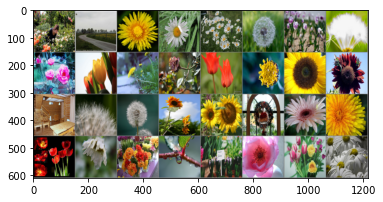

rose  dandelion dandelion daisy daisy dandelion tulip dandelion rose  tulip dandelion rose  tulip dandelion sunflower sunflower sunflower dandelion dandelion sunflower sunflower rose  daisy dandelion tulip daisy tulip rose  tulip rose  rose  daisy


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 15 * 15, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        #nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv2(x)))
       # nn.Dropout(p=0.4)
        x = self.pool(F.relu(self.conv3(x)))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=learning_rate)

Epoch [1/25], Step [108/108], Time taken:[65.8335907459259 seconds], Loss: 2.6210
Epoch [2/25], Step [108/108], Time taken:[45.47177982330322 seconds], Loss: 2.6090
Epoch [3/25], Step [108/108], Time taken:[47.56131052970886 seconds], Loss: 2.5900
Epoch [4/25], Step [108/108], Time taken:[45.53721070289612 seconds], Loss: 2.5030
Epoch [5/25], Step [108/108], Time taken:[46.81679964065552 seconds], Loss: 2.3270
Epoch [6/25], Step [108/108], Time taken:[47.25201916694641 seconds], Loss: 2.2300
Epoch [7/25], Step [108/108], Time taken:[51.376784563064575 seconds], Loss: 2.2000
Epoch [8/25], Step [108/108], Time taken:[58.26580882072449 seconds], Loss: 2.1630
Epoch [9/25], Step [108/108], Time taken:[55.13398194313049 seconds], Loss: 2.1440
Epoch [10/25], Step [108/108], Time taken:[53.33811593055725 seconds], Loss: 2.1210
Epoch [11/25], Step [108/108], Time taken:[55.18052315711975 seconds], Loss: 2.0930
Epoch [12/25], Step [108/108], Time taken:[52.69638514518738 seconds], Loss: 2.0680
E

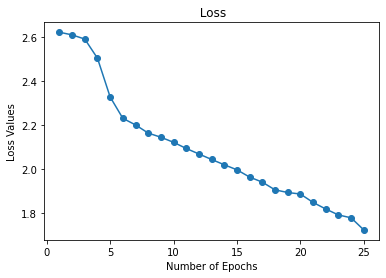

Finished Training


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time

num_of_epochs = 25
loss_list = []
for epoch in range(num_of_epochs):  # loop over the dataset multiple times
    epoch_start_time = time.time()
    running_loss = 0.0
    #legend = 'epoch:'+str(epoch+1)
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()
    
    # print statistics
    avg_running_loss = round(running_loss/i+1,3)
    epoch_end_time = time.time()
    print (f'Epoch [{epoch+1}/{num_of_epochs}], Step [{i+1}/{len(trainloader)}], Time taken:[{epoch_end_time - epoch_start_time} seconds], Loss: {avg_running_loss:.4f}')
    loss_list.append(avg_running_loss)
x_values = np.arange(1,num_of_epochs+1)
plt.plot(x_values,loss_list,marker='o')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Values")
plt.title(" Loss")
#plt.legend()
plt.show()      
print('Finished Training')

In [12]:
PATH = './flowers_net.pth'
torch.save(net.state_dict(), PATH)

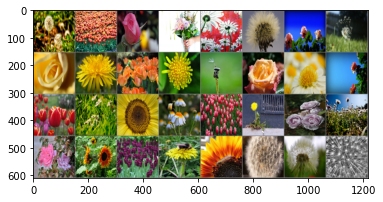

GroundTruth:  dandelion tulip rose  rose  daisy dandelion rose  dandelion rose  dandelion tulip dandelion dandelion rose  daisy rose  tulip daisy sunflower daisy tulip dandelion rose  daisy rose  sunflower tulip dandelion sunflower dandelion dandelion dandelion


In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [14]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [15]:
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  dandelion tulip rose  rose  rose  dandelion tulip daisy dandelion dandelion tulip dandelion dandelion rose  daisy daisy tulip dandelion sunflower daisy tulip daisy rose  sunflower rose  tulip tulip dandelion tulip dandelion dandelion dandelion


In [17]:
correct_train = 0
total_train = 0
with torch.no_grad():
    for train_data in trainloader:
        train_images, train_labels = train_data
        # calculate outputs by running images through the network
        train_outputs = net(train_images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(train_outputs.data, 1)
        total_train += train_labels.size(0)
        correct_train += (predicted == train_labels).sum().item()
print(f'Accuracy of the network on the {len(traindataset)} train images: {100 * correct_train // total_train} %')
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the {len(testdataset)} test images: {100 * correct // total} %')

Accuracy of the network on the 3452 train images: 75 %
Accuracy of the network on the 865 test images: 64 %


In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: daisy is 66.7 %
Accuracy for class: dandelion is 75.4 %
Accuracy for class: rose  is 41.4 %
Accuracy for class: sunflower is 72.1 %
Accuracy for class: tulip is 64.5 %
